# Statistical Modeling Tasks

## 1. Generalized Linear Models (GLM)

Generalized Linear Models extend linear models to distributions other than the normal distribution, such as Poisson for count data.

## 2. Robust Regression

Robust regression techniques like RANSAC and Theil-Sen are essential for handling outliers effectively.

## 3. Mixed Effects Models

Mixed Effects Models analyze data involving both fixed and random effects, suitable for complex, hierarchical data structures.

In [1]:

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Poisson

# Load the scotland dataset (no need for 'as_pandas' argument)
data_glm = sm.datasets.scotland.load()

# Add constant to the exogenous variables (for the intercept term)
data_glm.exog = sm.add_constant(data_glm.exog, prepend=False)

# Fit the GLM Poisson regression model
glm_poisson = GLM(data_glm.endog, data_glm.exog, family=Poisson())
res_poisson = glm_poisson.fit()

# Print the summary of the model
print("GLM (Poisson Regression) Results:")
print(res_poisson.summary())


GLM (Poisson Regression) Results:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.798
Date:                Tue, 22 Oct 2024   Deviance:                       5.1846
Time:                        01:48:04   Pearson chi2:                     5.14
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5729
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
CO

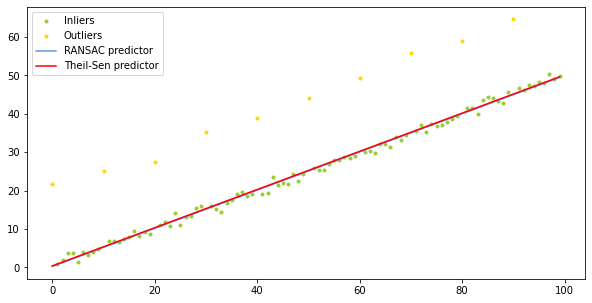

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, TheilSenRegressor

# Generating sample data with outliers
np.random.seed(0)
x = np.arange(100)
y = 0.5 * x + np.random.normal(size=x.size)
y[::10] += 20  # adding outliers

# RANSAC Regression
ransac = RANSACRegressor()
ransac.fit(x.reshape(-1, 1), y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Theil-Sen Estimator
theilsen = TheilSenRegressor()
theilsen.fit(x.reshape(-1, 1), y)

# Plotting results
plt.figure(figsize=(10, 5))
plt.scatter(x[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.', label='Inliers')
plt.scatter(x[outlier_mask], y[outlier_mask], color='gold', marker='.', label='Outliers')
plt.plot(x, ransac.predict(x.reshape(-1, 1)), color='cornflowerblue', label='RANSAC predictor')
plt.plot(x, theilsen.predict(x.reshape(-1, 1)), color='red', linestyle='-', label='Theil-Sen predictor')
plt.legend()
plt.show()
    

In [5]:

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Poisson

# Load the scotland dataset (no need for 'as_pandas' argument)
data_glm = sm.datasets.scotland.load()

# Add constant to the exogenous variables (for the intercept term)
data_glm.exog = sm.add_constant(data_glm.exog, prepend=False)

# Fit the GLM Poisson regression model
glm_poisson = GLM(data_glm.endog, data_glm.exog, family=Poisson())
res_poisson = glm_poisson.fit()

# Print the summary of the model
print("GLM (Poisson Regression) Results:")
print(res_poisson.summary())


GLM (Poisson Regression) Results:
                 Generalized Linear Model Regression Results                  
Dep. Variable:                    YES   No. Observations:                   32
Model:                            GLM   Df Residuals:                       24
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -97.798
Date:                Tue, 22 Oct 2024   Deviance:                       5.1846
Time:                        01:48:13   Pearson chi2:                     5.14
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5729
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
CO